In [1]:
from clarinet import BayesNet

## Making a network

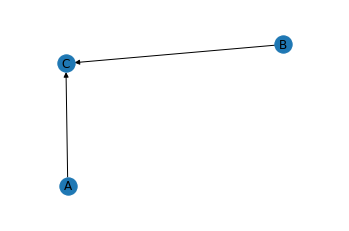

In [2]:
# bnlearn-style init
example = BayesNet.from_modelstring("[A][B][C|A:B]")
example.draw()

A `BayesNet` has a variety of different properties, but the main one is a (immutable) `dict` of `Node` objects:

In [3]:
example.nodes

immutables.Map({'A': Node(name='A', parents=(), children=('C',)), 'B': Node(name='B', parents=(), children=('C',)), 'C': Node(name='C', parents=('A', 'B'), children=())})

We can access nodes directly through indexing the object:

In [4]:
example['A']

Node(name='A', parents=(), children=('C',))

How do we add new nodes, or modify properties of this network? 

Perhaps unintuitively, objects in `clarinet` are *immutable*, so you cannot assign things to their fields, and methods to modify the object will return a *modified copy* of the object. This is inspired by functional programming like in `numpy`, and ensures that no funny business occurs as a result of mutated internal state.

In [5]:
example.nodes = ... # this cell will not work

TypeError: "BayesNet" is immutable and does not support item assignment

So to add a node to the network, we use the `BayesNet.add_node` method:

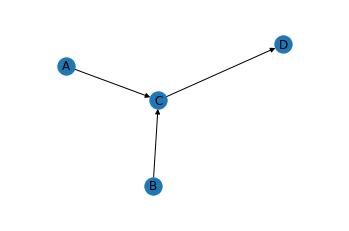

In [6]:
example_new = example.add_node('D', parents=['C']) # note the explicit assignment
example_new.draw()

To view the junction tree for this network, we can leverage `networkx` in the background through the `BayesNet.junction_tree` method:

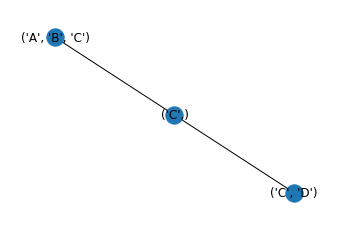

In [7]:
example_new.junction_tree(draw=True)

If we want to use the junction tree more than once, we can invoke the `cache=True` keyword argument, which will return a copy of the network that has the junction tree stored:

In [11]:
jt, cached_net = example_new.junction_tree(cache=True)
cached_net.junction_tree() # this will now just return a stored jt instead of generating it from scratch

We can also add more properties to nodes, such as state names and probability tables:

In [12]:
example_probs = example_new.add_prob_tables(
    ['A', 'B', 'C', 'D'],
    tables = [
        [0.1,0.9],
        [0.2,0.8],
        [
            [[0.3,0.7],[0.7,0.3]], # A = 0, B = 0, 1
            [[0.4, 0.6],[0.6,0.4]] # A = 1, B = 0, 1
         ],
        [
            [0.45, 0.55], # C = 0
            [0.15, 0.85]  # C = 1
        ]
    ],
    states = [
        ['yes', 'no'],
        ['up', 'down'],
        ['red', 'blue'],
        ['today', 'tomorrow'],
    ]
)

# note the dimension names correspond to the parent nodes!
# also, the coordinates for each entry represent their states
example_probs['C'].prob_table

<xarray.DataArray 'C' (A: 2, B: 2, C: 2)>
array([[[0.3, 0.7],
        [0.7, 0.3]],

       [[0.4, 0.6],
        [0.6, 0.4]]])
Coordinates:
  * A        (A) <U3 'yes' 'no'
  * B        (B) <U4 'up' 'down'
  * C        (C) <U10 'prob(red)' 'prob(blue)'

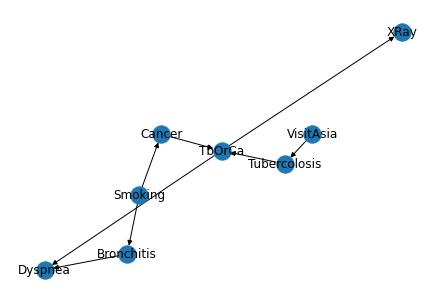

In [8]:
# from HBnet json specification
net = BayesNet.from_hbnet('hb.json')
net.draw()

In [9]:
net['Dyspnea'].prob_table

<xarray.DataArray 'Dyspnea' (TbOrCa: 2, Bronchitis: 2, Dyspnea: 2)>
array([[[0.9, 0.1],
        [0.7, 0.3]],

       [[0.8, 0.2],
        [0.1, 0.9]]])
Coordinates:
  * TbOrCa      (TbOrCa) <U3 'yes' 'no'
  * Bronchitis  (Bronchitis) <U3 'yes' 'no'
  * Dyspnea     (Dyspnea) <U9 'prob(yes)' 'prob(no)'